In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Gerekli Kütüphane çağırma işlemlerini yaptık.

In [108]:
df = pd.read_csv('Açlık-yolsuzluk.csv')

Data Setimizi okuduk.

In [109]:
df.head()


,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


Data setimizdeki ilk 5 gönderiye baktık.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


12 sütünumuz var ve bunların 9 tanesinin tipi kesirli, 2 tanesi tam sayı, 2 tane de metin. Toplanda 13 klonumuz var.

Ülke, Mutluluk, Yurtiçi Hasılat, Aile, Sağlık, Özgürlük, Cömerlik, Hükümete Güven, Bölge, Yıl, YOlsuzluk, Sosyal Destek, Skor

In [111]:
df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

Eksik veri yok.

In [112]:
df.shape

(792, 13)

Veri Setimiz 792 Satır, 13 Sutundan oluşuyor.

In [113]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


Betimsel İstatistiklerimize Baktık.

In [114]:
df["Country"].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Argentina', 'Mexico',
       'Singapore', 'Malta', 'Guatemala', 'Uruguay', 'Panama', 'France',
       'Thailand', 'Spain', 'Colombia', 'Saudi Arabia', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Japan',
       'Lithuania', 'Algeria', 'Latvia', 'Moldova', 'Romania', 'Bolivia',
       'Turkmenistan', 'Kazakhstan', 'Slovenia', 'Peru', 'Mauritius',
       'Cyprus', 'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Philippines', 'Serbia', 'Jordan', 'Hungary', 'Jamaica', 'Croatia',
       'Kosovo', 'China', 'Pakistan', 'Indonesia', 'Venezuela',
       'Montenegro', 'Morocco

Kod ile country değişkeni içerisindeki birbirinden farklı tanımlara baktık.Böylelikle Veri setimizde hangi ülkeler olduğuna baktık.

Text(0.5, 1.0, 'The average happiness score in 5 years  ')

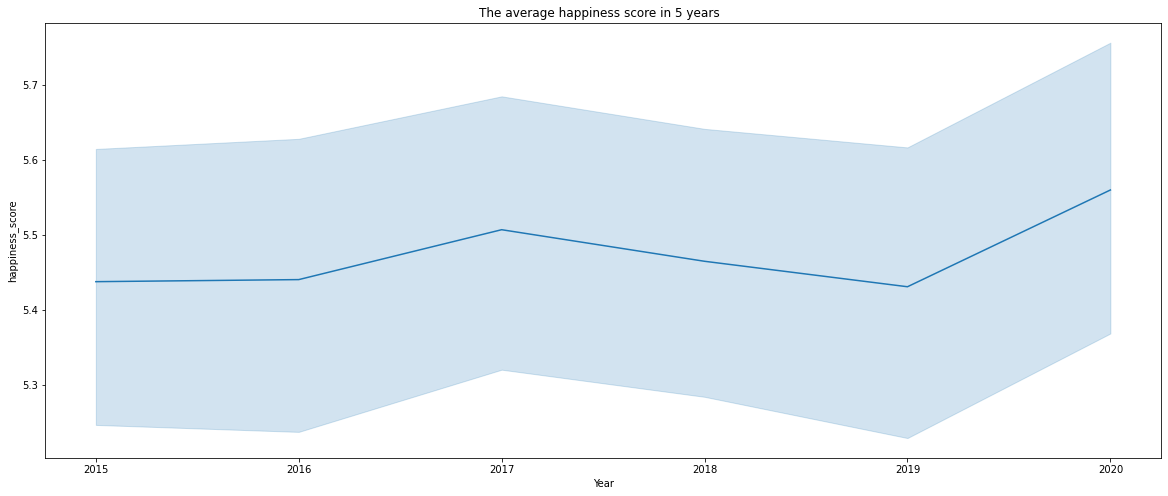

In [115]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x="Year",y="happiness_score")
plt.title("The average happiness score in 5 years  ")

Yıllara göre mutluluk değerlerini inceledik.

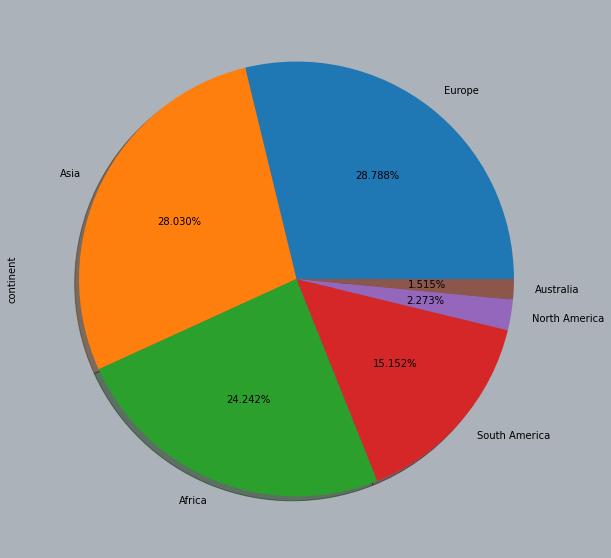

In [116]:
plt.figure(figsize = [10, 10], clear = True, facecolor = "#ABB2B9")
df["continent"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

En mutlu kıtaya baktık.

<AxesSubplot:xlabel='continent'>

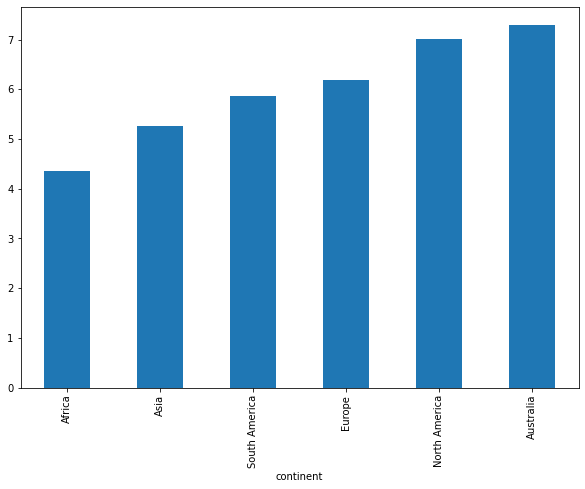

In [117]:
avg_co= df.groupby("continent")["happiness_score"].mean()
avg_co.sort_values()
avg_co.sort_values().plot(kind="bar",figsize=(10,7))

Kıtalara göre mutluluk grafiğini inceledik.

In [118]:
Turkiye= df[df["Country"]=="Turkey"]


Şimdi türkiyenin değerlerini inceleyeceğiz.

In [127]:
Turkiye.value_counts()

Country  happiness_score  gdp_per_capita  family    health    freedom   generosity  government_trust  dystopia_residual  continent  Year  social_support  cpi_score
Turkey   5.1318           1.127169        0.000000  0.781335  0.254401  0.085886    0.120983          1.564817           Asia       2020  1.197159        40           1
         5.3320           1.060980        0.946320  0.731720  0.228150  0.122530    0.157460          2.085280           Asia       2016  0.000000        41           1
         5.3730           1.183000        0.000000  0.808000  0.195000  0.083000    0.106000          0.000000           Asia       2017  1.360000        40           1
         5.3890           1.164920        0.877170  0.647180  0.238890  0.047070    0.123480          2.290740           Asia       2019  0.000000        39           1
         5.4830           1.148000        0.000000  0.686000  0.324000  0.106000    0.109000          0.000000           Asia       2018  1.380000        41    

Türkiyenin en mutlu yılı 2015 olduğunu ve en düşük mutluluk seviyesinin 2020 yılında olduğunu görüyoruz. Şimdi görselleştirelim.

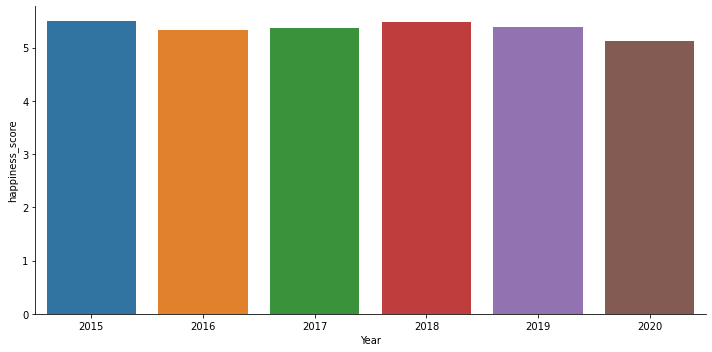

In [119]:
sns.catplot(x="Year", y="happiness_score", data=Turkiye, kind='bar', height=5, aspect=2)

Bizim mutluluk seviyemiz verimizin ortalama değerine yakın çıktı. Ortalama Değer: 5.473310

In [122]:
mutlular = df[df["happiness_score"] >= 7.808700 ]

En mutlu ülkeyi buluyoruz burada. Yukarıdaki Betimsel istatistik kısmında max mutluluk değeri = 7.808700 olan ülkeyi arıyoruz. 

In [123]:
mutlular

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
660,Finland,7.8087,1.28519,0.0,0.961271,0.662317,0.15967,0.477857,2.762835,Europe,2020,1.499526,85


En mutlu ülke firlandiya.

In [124]:
Firlandiya = df[df["Country"]=="Finland"]

Yanlızca firlandiyayı aldık.

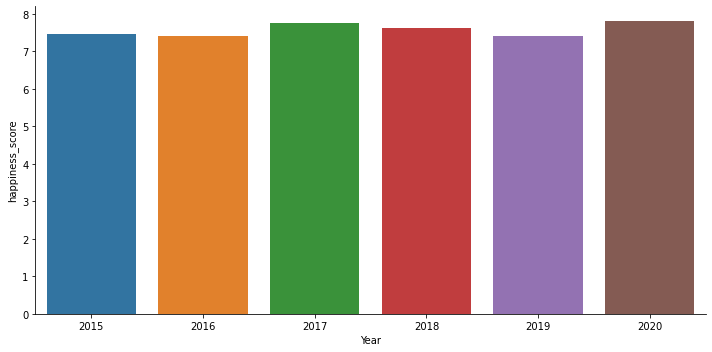

In [125]:
sns.catplot(x="Year", y="happiness_score", data=Firlandiya, kind='bar', height=5, aspect=2)

Adamlar hep mutluymus...

In [132]:
uzgun = df[df["happiness_score"] <= 2.6 ]

In [133]:
uzgun

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
791,Afghanistan,2.5669,0.300706,0.0,0.266052,0.0,0.135235,0.001226,1.507236,Asia,2020,0.356434,19


En üzgün ülke afganistanmış.

In [136]:
Afganistan = df[df["Country"]=="Afghanistan"]

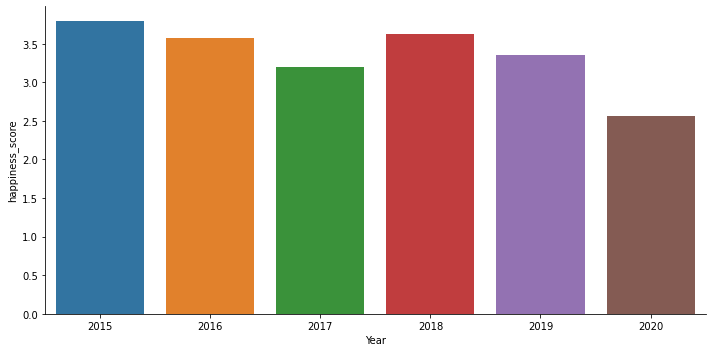

In [137]:
sns.catplot(x="Year", y="happiness_score", data=Afganistan, kind='bar', height=5, aspect=2)

3.5 Üstünde olan mutluluk seviyesi 2.5 seviyelerine kadar düştüğünü görüyoruz..